Import Modules

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

Read CSV

In [33]:
df = pd.read_csv("ptt_daily_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,PTT.BK,PTT.BK,PTT.BK,PTT.BK,PTT.BK,PTT.BK
1,2024-05-02,33.5,33.75,33.25,33.25,31.116962432861328,39656500
2,2024-05-03,33.25,33.75,33.25,33.75,31.584888458251953,32885000
3,2024-05-07,33.75,33.75,33.75,33.75,31.584888458251953,0
4,2024-05-08,33.75,34.0,33.5,33.75,31.584888458251953,63054700


Delete not interested row

In [34]:
df_cleaned = df.iloc[2:].copy()
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,2024-05-03,33.25,33.75,33.25,33.75,31.584888458251953,32885000
3,2024-05-07,33.75,33.75,33.75,33.75,31.584888458251953,0
4,2024-05-08,33.75,34.0,33.5,33.75,31.584888458251953,63054700
5,2024-05-09,33.75,34.0,33.5,33.75,31.584888458251953,20770900
6,2024-05-10,33.75,33.75,33.5,33.75,31.584888458251953,11790800


Change type of Columns to Numeric

In [35]:
df_cleaned.rename(columns={"Price":"Date"}, inplace=True)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
df_cleaned[cols] = df_cleaned[cols].apply(pd.to_numeric)
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,2024-05-03,33.25,33.75,33.25,33.75,31.584888,32885000
3,2024-05-07,33.75,33.75,33.75,33.75,31.584888,0
4,2024-05-08,33.75,34.00,33.50,33.75,31.584888,63054700
5,2024-05-09,33.75,34.00,33.50,33.75,31.584888,20770900
6,2024-05-10,33.75,33.75,33.50,33.75,31.584888,11790800


Exploratory Data Analysis

In [37]:
mean_close = df_cleaned["Close"].mean()
median_close = df_cleaned["Close"].median()
mode_close = df_cleaned["Close"].mode().iloc[0]

print(f"Mean : {mean_close}")
print(f"Median : {median_close}")
print(f"Mode : {mode_close}")

Mean : 32.166984732824424
Median : 32.25
Mode : 33.5


Histogram (Data Distribution)

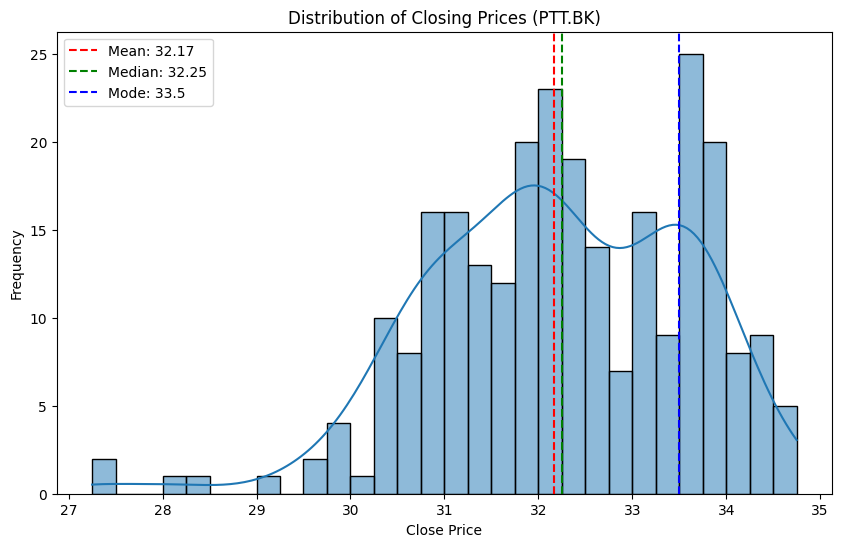

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned["Close"], kde=True, bins=30)
plt.axvline(mean_close, color='red', linestyle='--', label=f'Mean: {mean_close:.2f}')
plt.axvline(median_close, color='green', linestyle='--', label=f'Median: {median_close:.2f}')
plt.axvline(mode_close, color='blue', linestyle='--', label=f'Mode: {mode_close}')
plt.title("Distribution of Closing Prices (PTT.BK)")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Finding Outliers

In [44]:
close_prices = df_cleaned["Close"]

Q1 = close_prices.quantile(0.25)
Q3 = close_prices.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = close_prices[(close_prices < lower_bound)|(close_prices > upper_bound)]

print(f"จำนวน outliers : {len(outliers)}")
print(outliers)

จำนวน outliers : 2
212    27.25
213    27.25
Name: Close, dtype: float64


Boxplot Diagram (Show the Outliers)

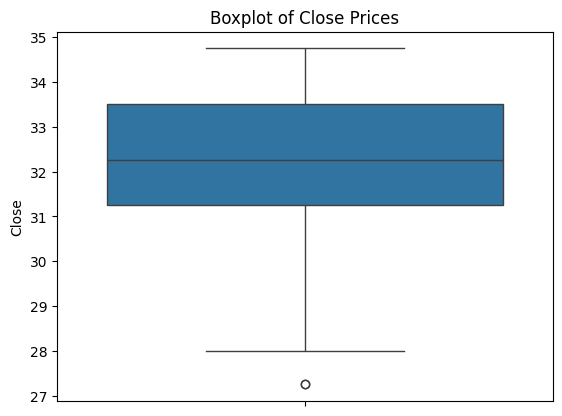

In [46]:
sns.boxplot(data=close_prices)
plt.title("Boxplot of Close Prices")
plt.show()

Covarience analysis

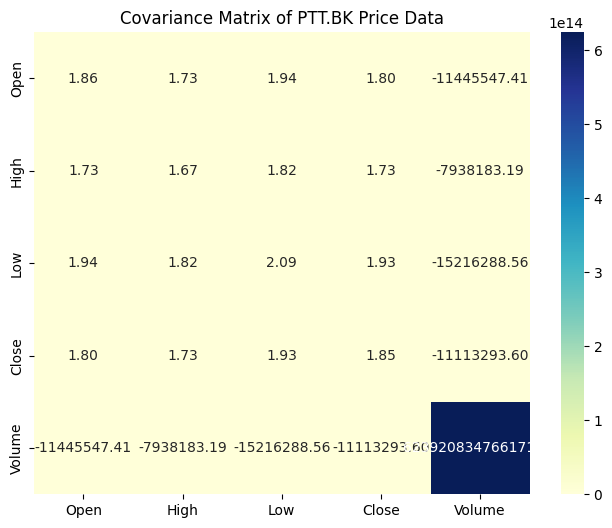

In [49]:
covarience = df_cleaned[["Open", "High", "Low", "Close", "Volume"]].cov()

plt.figure(figsize=(8,6))
sns.heatmap(covarience, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Covariance Matrix of PTT.BK Price Data")
plt.show()

Correlation analysis

            Open      High       Low     Close    Volume
Open    1.000000  0.981596  0.985332  0.968814 -0.335810
High    0.981596  1.000000  0.974512  0.982600 -0.245914
Low     0.985332  0.974512  1.000000  0.981123 -0.421547
Close   0.968814  0.982600  0.981123  1.000000 -0.326802
Volume -0.335810 -0.245914 -0.421547 -0.326802  1.000000


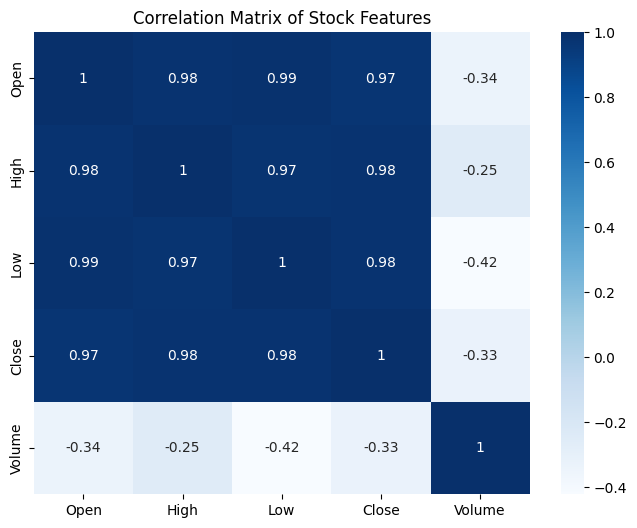

In [51]:
correlation = df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

print(correlation)

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Stock Features')
plt.show()

Hypothesis Testing (Paired t-test)

In [53]:
before = df_cleaned[(df_cleaned["Date"] >= "2025-04-01") & (df_cleaned["Date"] <= "2025-04-11")]["Close"]
after = df_cleaned[(df_cleaned["Date"] >= "2025-04-17") & (df_cleaned["Date"] <= "2025-04-28")]["Close"]

min_len = min(len(before), len(after))
before = before[:min_len]
after = after[:min_len]

t_stat, p_value = ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 3.464
P-value: 0.010


Model training (Linear regression to predict Close price of stock market)

In [56]:
#Prepare data
X = df_cleaned[['Open', 'High', 'Low', 'Volume']]
y = df_cleaned['Close']

#Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

#Predict Close price by Open price
df_cleaned['Predicted_Close'] = model.predict(X)
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Predicted_Close
2,2024-05-03,33.25,33.75,33.25,33.75,31.584888,32885000,33.587097
3,2024-05-07,33.75,33.75,33.75,33.75,31.584888,0,33.699461
4,2024-05-08,33.75,34.00,33.50,33.75,31.584888,63054700,33.744309
5,2024-05-09,33.75,34.00,33.50,33.75,31.584888,20770900,33.708059
6,2024-05-10,33.75,33.75,33.50,33.75,31.584888,11790800,33.523320


RMSE Calculation

In [57]:
rmse = np.sqrt(mean_squared_error(df_cleaned['Close'], df_cleaned['Predicted_Close']))
print(f"RMSE: {rmse:.3f} Baht")

RMSE: 0.188 Baht


Comparison Graph

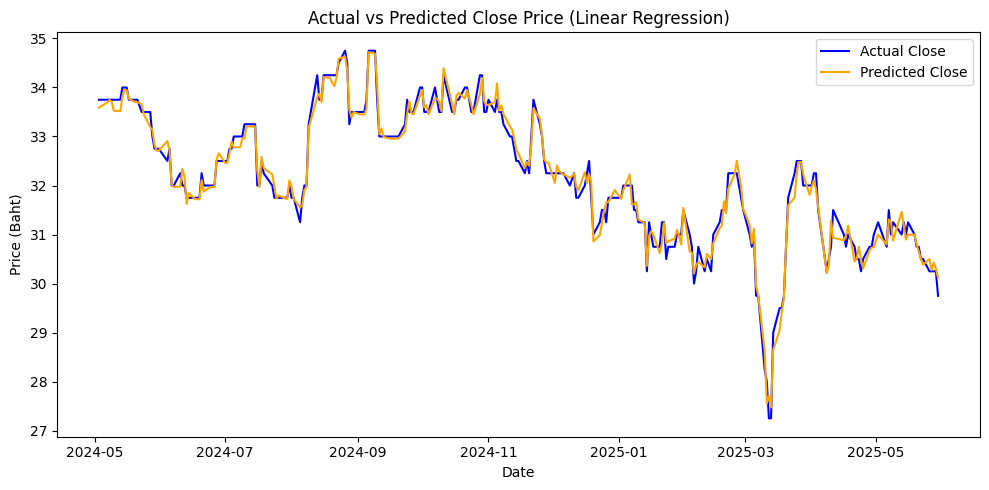

In [59]:
plt.figure(figsize=(10,5))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Actual Close', color='blue')
plt.plot(df_cleaned['Date'], df_cleaned['Predicted_Close'], label='Predicted Close', color='orange')
plt.xlabel('Date')
plt.ylabel('Price (Baht)')
plt.title('Actual vs Predicted Close Price (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()